# Task2: Prediction using Unsupervised ML
## Name: Hardik Tejani
## DataSet: IRIS
## Algorithm Used: K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading Data and checking it**

In [67]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Visualizing the Data**

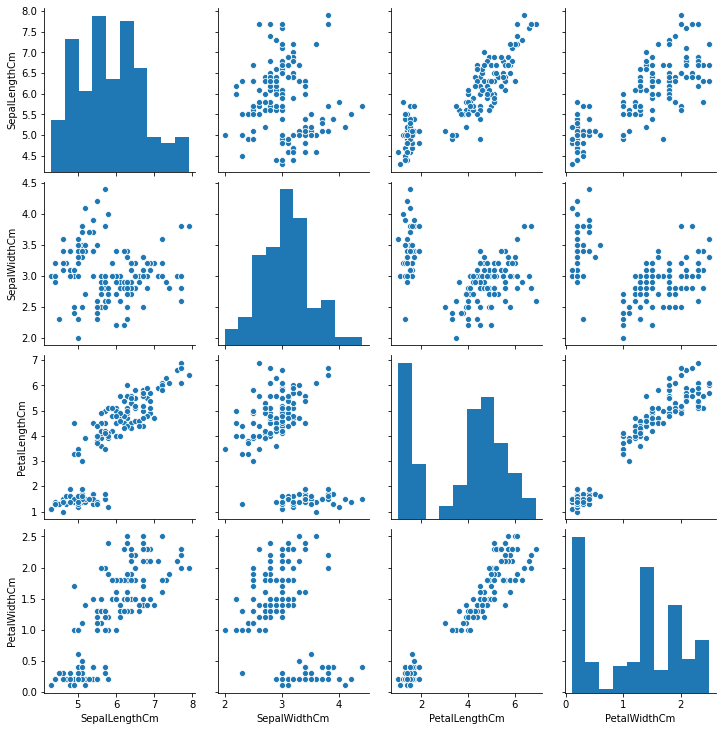

In [70]:
sns.pairplot(df)

**Visulazing with different colours**

In [71]:
colors = ['red', 'green', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

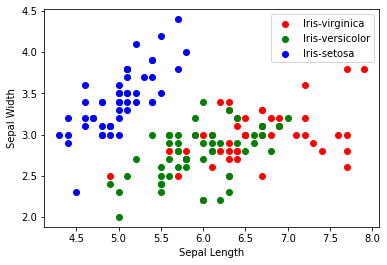

In [72]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

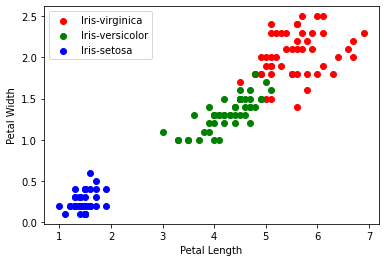

In [73]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

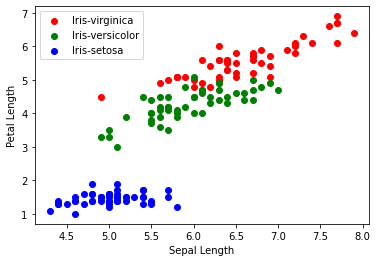

In [74]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

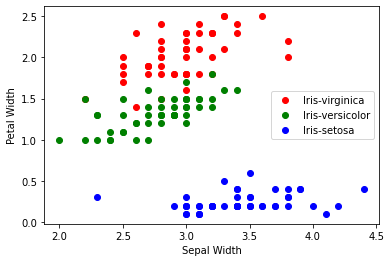

In [75]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

**Visualizing the distribution**

In [76]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

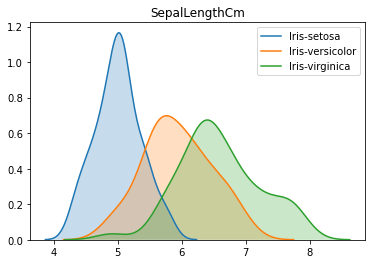

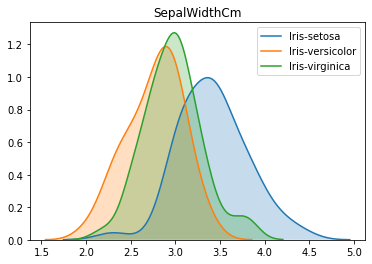

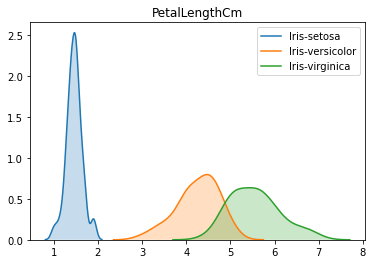

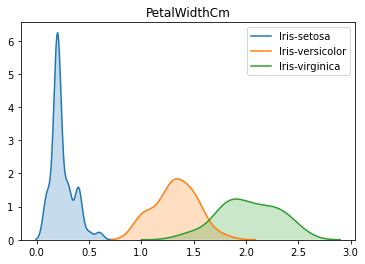

In [77]:
for i in df.columns[:-1]:
    
    sns.kdeplot(data = df.loc[df.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = df.loc[df.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = df.loc[df.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show()

**Checking Correlation between Data**

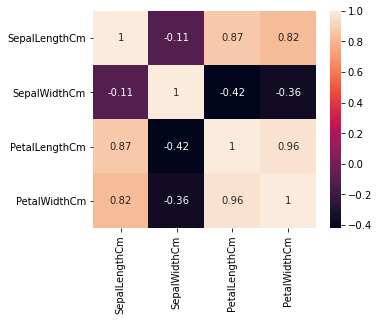

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True)

**Importing Kmeans model and checking for the optimal Value of K**

In [78]:
from sklearn.cluster import KMeans

In [79]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(df.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

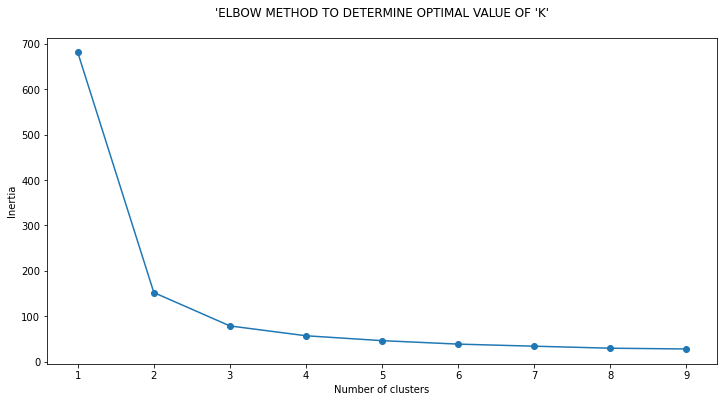

In [80]:
df1 = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df1['Cluster'], df1['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [81]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(df.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [83]:
df['cluster'] = kmeans.labels_

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [85]:
df['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

In [88]:
display(df['cluster'].value_counts(), df['Species'].value_counts())

2    62
1    50
0    38
Name: cluster, dtype: int64

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Visualizing Clusters**

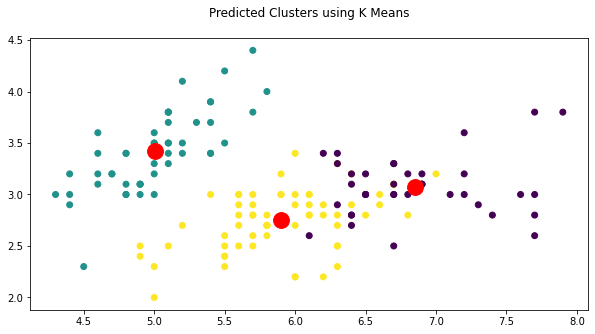

In [118]:
plt.figure(figsize=(10,5))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df.cluster)
plt.title('Predicted Clusters using K Means\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=250, c='red', label = 'Centroids')
plt.show()

In [92]:
from mpl_toolkits.mplot3d import Axes3D

In [95]:
labels = kmeans.labels_

Text(0.5, 0.92, 'K Means Predicted Clusters: Side View')

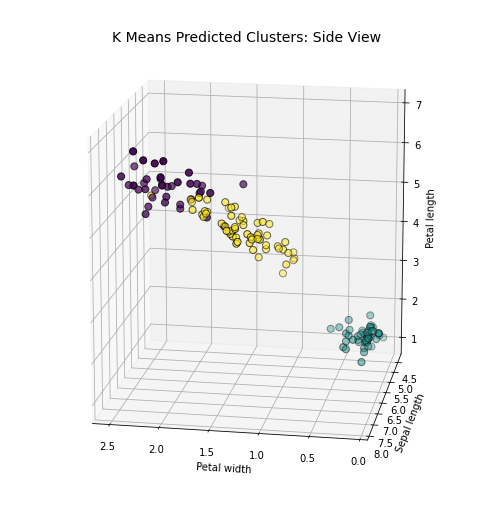

In [119]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=15, azim=100)
ax.scatter(df.iloc[:, 3], df.iloc[:, 0], df.iloc[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means Predicted Clusters: Side View", fontsize=14)

Text(0.5, 0.92, 'K Means Predicted Clusters: Top View ')

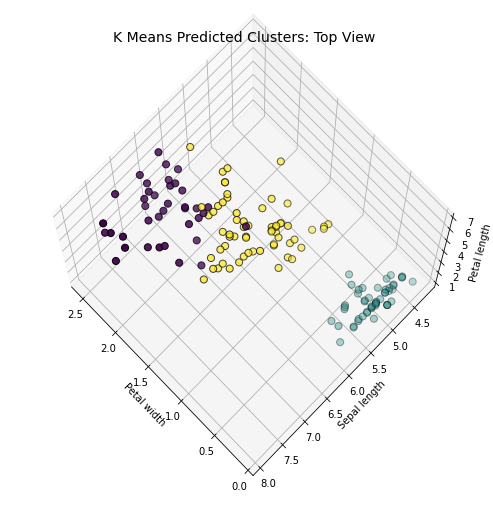

In [120]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=75, azim=135)
ax.scatter(df.iloc[:, 3], df.iloc[:, 0], df.iloc[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means Predicted Clusters: Top View ", fontsize=14)